In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
fichier = "../Clean_data/Pages_all.xlsx"
pages_df = pd.read_excel(fichier)
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
pd.set_option('display.width', 1000)        # Pour éviter les retours à la ligne
pd.set_option('display.precision', 4)       # Pour les nombres décimaux

# Nettoyage
pages_df = pages_df[pages_df['Source'] != 'Global']
# Renommer la colonne pour simplifier
pages_df.rename(columns={"Pages_les_plus_populaires": "Page"}, inplace=True)
print(pages_df.head())

                                                Page  Clics  Impressions     CTR  Position            Source
0  https://www.michelinman.com/auto/manufacturers...   1928       114949  0.0168     11.27  manufacturer URL
1  https://www.michelinman.com/auto/manufacturers...   1434       103885  0.0138     14.74  manufacturer URL
2  https://www.michelinman.com/auto/manufacturers...    963        72245  0.0133     13.18  manufacturer URL
3  https://www.michelinman.com/auto/manufacturers...    922        68787  0.0134     21.49  manufacturer URL
4  https://www.michelinman.com/auto/manufacturers...    631        27413  0.0230     10.55  manufacturer URL


C:\Users\HP\AppData\Local\Temp\ipykernel_19752\4084430227.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pages_df.sort_values("Clics", ascending=False).head(10), y="Page", x="Clics", palette="Blues_d")


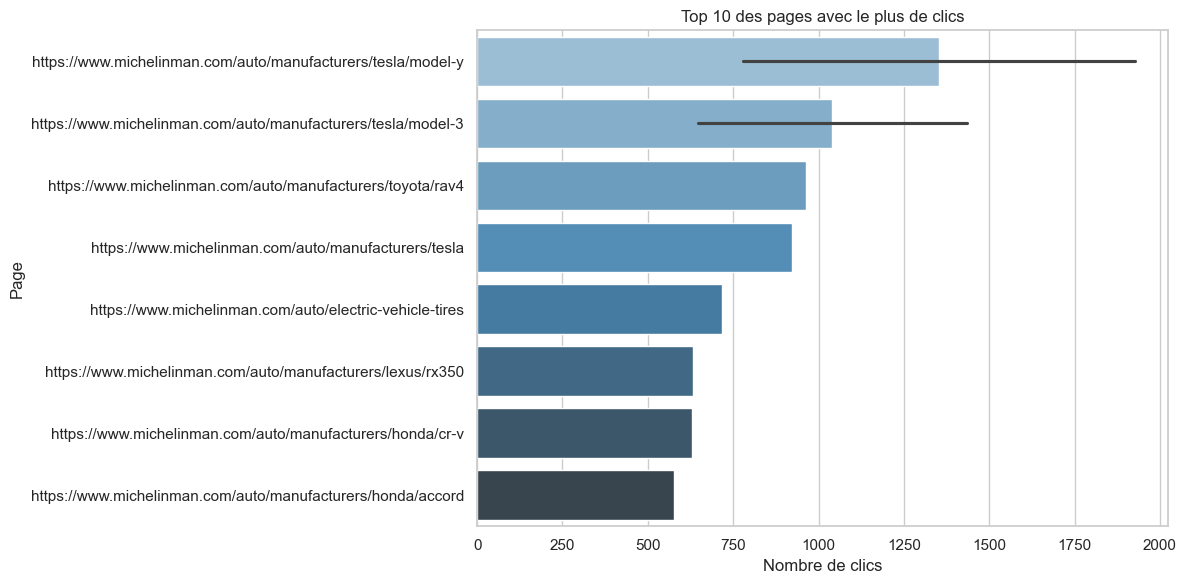

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\4084430227.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pages_df.sort_values("Impressions", ascending=False).head(10), y="Page", x="Impressions", palette="Oranges_d")


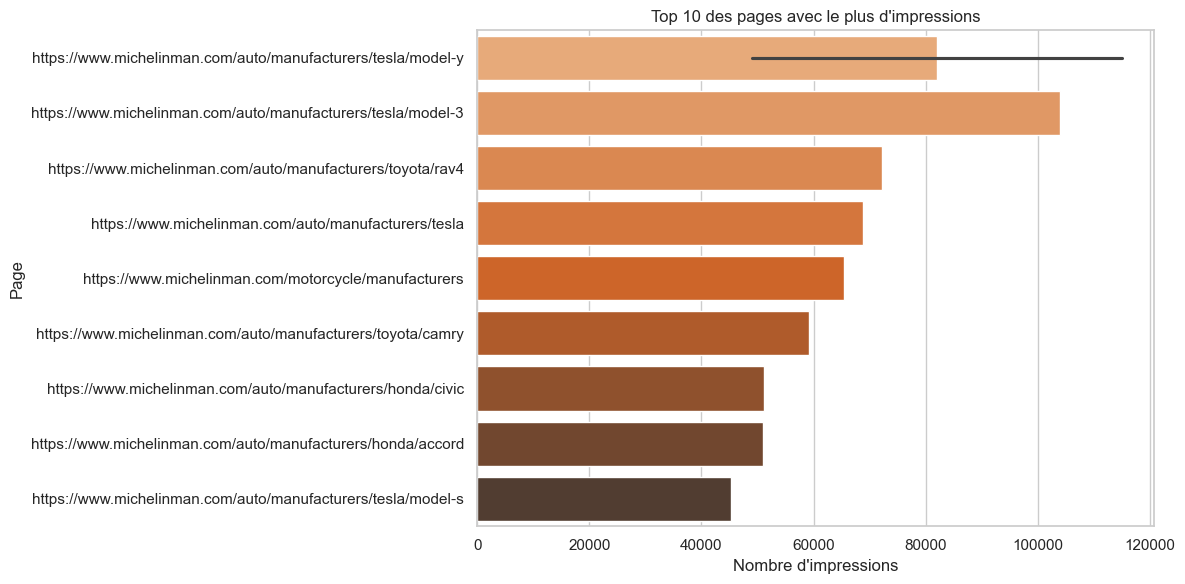

In [5]:
sns.set_theme(style="whitegrid")
# 1. Top 10 des pages en clics
plt.figure(figsize=(12, 6))
sns.barplot(data=pages_df.sort_values("Clics", ascending=False).head(10), y="Page", x="Clics", palette="Blues_d")
plt.title("Top 10 des pages avec le plus de clics")
plt.xlabel("Nombre de clics")
plt.ylabel("Page")
plt.tight_layout()
plt.show()

# 2. Top 10 des pages en impressions
plt.figure(figsize=(12, 6))
sns.barplot(data=pages_df.sort_values("Impressions", ascending=False).head(10), y="Page", x="Impressions", palette="Oranges_d")
plt.title("Top 10 des pages avec le plus d'impressions")
plt.xlabel("Nombre d'impressions")
plt.ylabel("Page")
plt.tight_layout()
plt.show()


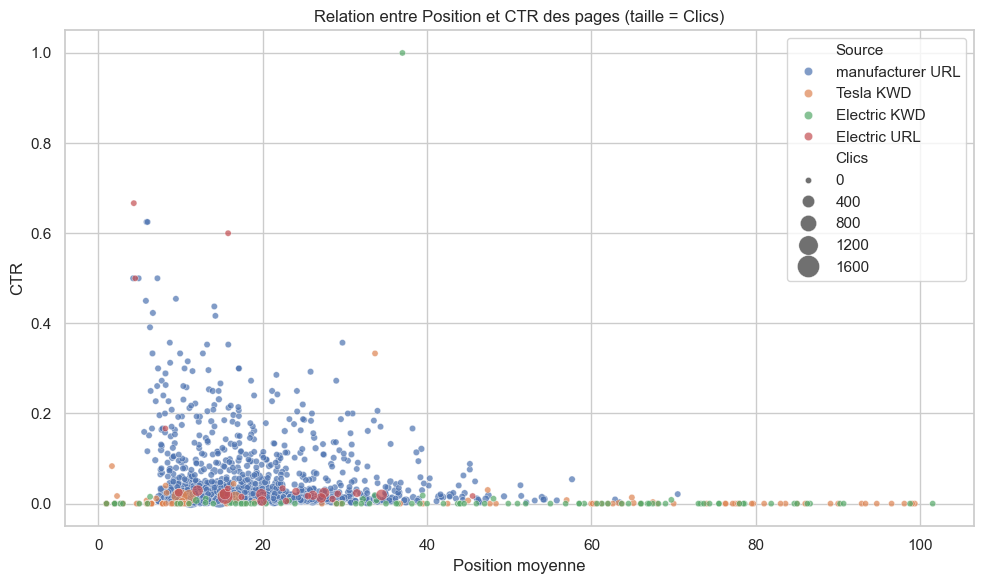

In [6]:
# 3. Scatter CTR vs Position (taille = clics)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pages_df, x="Position", y="CTR", size="Clics", hue="Source", alpha=0.7, sizes=(20, 300))
plt.title("Relation entre Position et CTR des pages (taille = Clics)")
plt.xlabel("Position moyenne")
plt.ylabel("CTR")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1239639671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pages_interessantes, y="Page", x="CTR", palette="Greens")
C:\Users\HP\AppData\Local\Temp\ipykernel_19752\1239639671.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


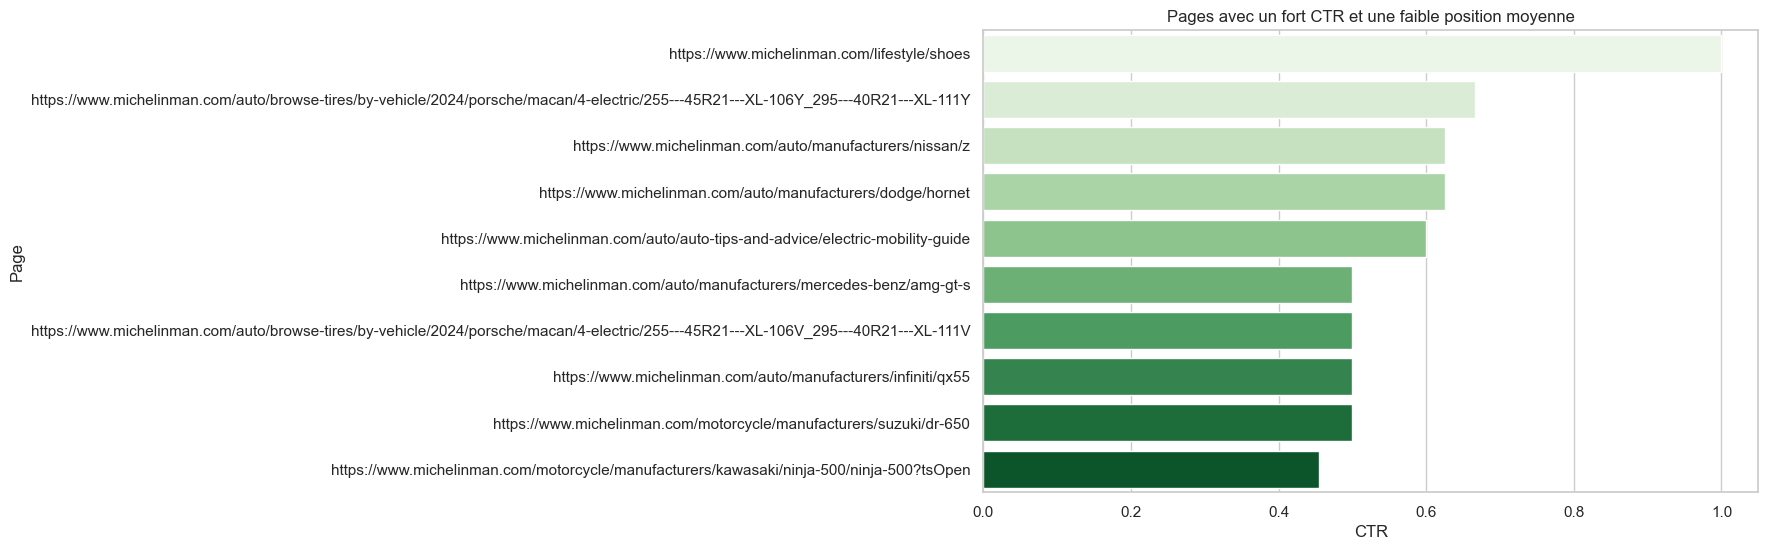

In [7]:
# 4. Pages avec fort CTR mais faible position
pages_interessantes = pages_df.sort_values(by=["CTR", "Position"], ascending=[False, True]).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=pages_interessantes, y="Page", x="CTR", palette="Greens")
plt.title("Pages avec un fort CTR et une faible position moyenne")
plt.xlabel("CTR")
plt.ylabel("Page")
plt.tight_layout()
plt.show()

,Clics totaux,Impressions totales,CTR (moy. pondérée),Position (moy. pondérée)
Électrique,49429.0,3803559.0,0.0130,18.6828
Autres,6086.0,368522.0,0.0165,16.8266


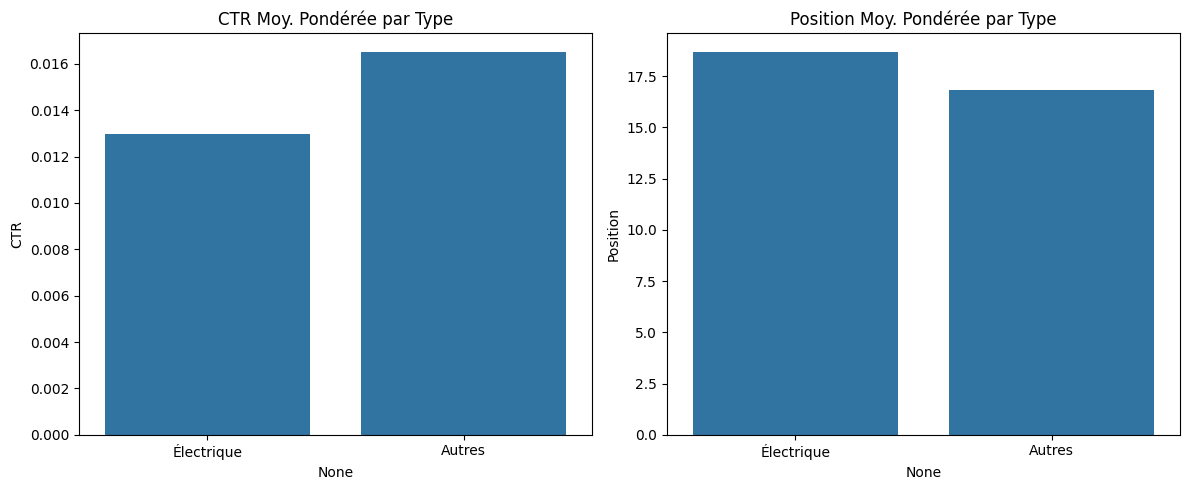

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier
fichier = "../Clean_data/Pages_all.xlsx"
df_pages = pd.read_excel(fichier)
pd.set_option('display.max_columns', None)  # Pour voir toutes les colonnes
pd.set_option('display.width', 1000)        # Pour éviter les retours à la ligne
pd.set_option('display.precision', 4)       # Pour les nombres décimaux

# Nettoyage
df_pages = df_pages[df_pages['Source'] != 'Global']
# Renommer la colonne pour simplifier
df_pages.rename(columns={"Pages_les_plus_populaires": "Page"}, inplace=True)

# Filtrage
df_electric = df_pages[df_pages['Page'].str.contains("https://www.michelinman.com/auto", case=False)].copy()
df_non_electric = df_pages[~df_pages['Page'].str.contains("https://www.michelinman.com/auto", case=False)].copy()

df_electric["Type"] = "Électrique"
df_non_electric["Type"] = "Autres"
df_combined = pd.concat([df_electric, df_non_electric], ignore_index=True)

# Moyennes pondérées
def weighted_average(df, value_col, weight_col="Impressions"):
    return (df[value_col] * df[weight_col]).sum() / df[weight_col].sum()

metrics = ['CTR', 'Position']
weighted_results = {}
for t in ['Électrique', 'Autres']:
    sub_df = df_combined[df_combined['Type'] == t]
    weighted_results[t] = {
        'Clics totaux': sub_df['Clics'].sum(),
        'Impressions totales': sub_df['Impressions'].sum(),
        'CTR (moy. pondérée)': weighted_average(sub_df, 'CTR'),
        'Position (moy. pondérée)': weighted_average(sub_df, 'Position')
    }

df_weighted = pd.DataFrame(weighted_results).T
display(df_weighted)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=df_weighted.index, y='CTR (moy. pondérée)', data=df_weighted.reset_index(), ax=axes[0])
axes[0].set_title("CTR Moy. Pondérée par Type")
axes[0].set_ylabel("CTR")

sns.barplot(x=df_weighted.index, y='Position (moy. pondérée)', data=df_weighted.reset_index(), ax=axes[1])
axes[1].set_title("Position Moy. Pondérée par Type")
axes[1].set_ylabel("Position")
plt.tight_layout()
plt.savefig("../Assets/ctr_pos_par_type.png")
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Chargement des données
pages_df = pd.read_excel("../Clean_data/Pages_all.xlsx")
pages_df = pages_df[pages_df['Source'] != 'Global']
pages_df.rename(columns={"Pages_les_plus_populaires": "Page"}, inplace=True)

# Fonction pour extraire la marque depuis l'URL
def extraire_marque(url):
    parts = url.split("/auto/manufacturers/")
    if len(parts) > 1:
        chemin = parts[1]
        marque = chemin.split("/")[0]
        return marque.capitalize()
    return "Autre"

# Application de l'extraction
pages_df["Marque"] = pages_df["Page"].apply(extraire_marque)

# Agrégation des clics par marque
marques_clics = pages_df.groupby("Marque", as_index=False)["Clics"].sum()

# Exclure "Autre" et trier
marques_clics = marques_clics[marques_clics["Marque"] != "Autre"]
marques_clics = marques_clics.sort_values("Clics", ascending=False)

# Génération du graphique
plt.figure(figsize=(10, 6))
top_marques = marques_clics.head(10)
sns.barplot(data=top_marques, y="Marque", x="Clics", palette="coolwarm")
plt.title("🚗 Marques les plus cliquées (Pages électriques)")
plt.xlabel("Nombre de clics")
plt.ylabel("Marque")
plt.tight_layout()

# Sauvegarde
if not os.path.exists("../Assets"):
    os.makedirs("../Assets")
plt.savefig("../Assets/clics_par_marque_page.png")
plt.close()


C:\Users\HP\AppData\Local\Temp\ipykernel_21640\2667598122.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_marques, y="Marque", x="Clics", palette="coolwarm")
C:\Users\HP\AppData\Local\Temp\ipykernel_21640\2667598122.py:37: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_21640\2667598122.py:42: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.savefig("../Assets/clics_par_marque_page.png")
